# Animal Intrusion Detection

In [ ]:
#list of useful imports that  I will use
%matplotlib inline
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.models import Model

#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D,Input
#from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file = '/content/drive/MyDrive/Animal_project/Animal_data (1).zip'

##Unziping data set

In [ ]:
import zipfile as zf
data_zip = zf.ZipFile(file)
data_zip.extractall()
!ls

Animal_data  drive  sample_data


In [ ]:
data = 'Animal_data'

In [ ]:
Images = []
import os
for dirname, _, filenames in os.walk(data):
    for filename in filenames:
        img = os.path.join(dirname, filename)
        Images.append(img)

In [ ]:
Images[:10]

['Animal_data/Horse/images (1).jpg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.24.52 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.24.50 AM (1).jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.24.33 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.25.19 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.24.49 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.25.01 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.25.10 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.25.17 AM.jpeg',
 'Animal_data/Horse/WhatsApp Image 2022-07-06 at 12.24.58 AM (1).jpeg']

In [ ]:
len(Images)

999

In [ ]:
Class_label = []
for i in Images:
  j = i.split("/")
  #print(j[1])
  Class_label.append(j[1])

In [ ]:
Class_label[:10]

['Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse',
 'Horse']

In [ ]:
len(Class_label)

999

In [ ]:
# Shuffle two lists with same order
# Using zip() + * operator + shuffle()
temp = list(zip(Images, Class_label))
random.shuffle(temp)
Images, Class_label = zip(*temp)

In [ ]:
data = pd.DataFrame(list(zip(Images, Class_label)), columns =['Image_path', 'Class_label'])

In [ ]:
data.head(5)

Image_path Class_label
0  Animal_data/Tiger/WhatsApp Image 2022-07-06 at...       Tiger
1  Animal_data/Tiger/WhatsApp Image 2022-07-06 at...       Tiger
2  Animal_data/Elephant/WhatsApp Image 2022-07-05...    Elephant
3  Animal_data/Cow/WhatsApp Image 2022-07-05 at 1...         Cow
4  Animal_data/Camel/WhatsApp Image 2022-07-05 at...       Camel

In [ ]:
data.Class_label.value_counts()

Rabbit      157
Monkey      122
Cow         117
Elephant    114
Tiger       112
Giraffe     108
Deer         97
Horse        83
Camel        74
Pig          15
Name: Class_label, dtype: int64

<ipython-input-16-ff59cf945e57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
<ipython-input-16-ff59cf945e57>:3: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

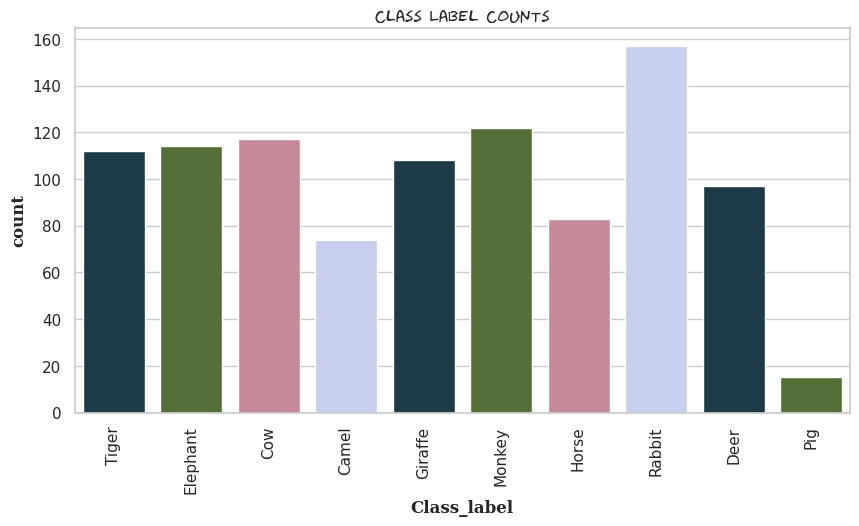

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes
df_c0 = data[data['Class_label']== 'Giraffe']
df_c1 = data[data['Class_label']== 'Deer']
df_c2 = data[data['Class_label']== 'Camel']
df_c3 = data[data['Class_label']== 'Cow']
df_c4 = data[data['Class_label']== 'Rabbit']
df_c5 = data[data['Class_label']== 'Pig']
df_c6 = data[data['Class_label']== 'Horse']
df_c7 = data[data['Class_label']== 'Monkey']
df_c8 = data[data['Class_label']== 'Tiger']
df_c9 = data[data['Class_label']== 'Elephant']


# Downsample majority class
df_c0_upsampled = resample(df_c0, replace=True,  n_samples = 200,random_state=123)
df_c1_upsampled = resample(df_c1, replace=True,  n_samples = 200,random_state=123)
df_c2_upsampled = resample(df_c2, replace=True,  n_samples = 200,random_state=123)
df_c3_upsampled = resample(df_c3, replace=True,  n_samples = 200,random_state=123)
df_c4_upsampled = resample(df_c4, replace=True,  n_samples = 200,random_state=123)
df_c5_upsampled = resample(df_c5, replace=True,  n_samples = 200,random_state=123)
df_c6_upsampled = resample(df_c6, replace=True,  n_samples = 200,random_state=123)
df_c7_upsampled = resample(df_c7, replace=True,  n_samples = 200,random_state=123)
df_c8_upsampled = resample(df_c8, replace=True,  n_samples = 200,random_state=123)
df_c9_upsampled = resample(df_c9, replace=True,  n_samples = 200,random_state=123)


# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_c0_upsampled,df_c1_upsampled,df_c2_upsampled,df_c3_upsampled,df_c4_upsampled,df_c5_upsampled,df_c6_upsampled,df_c7_upsampled,df_c8_upsampled,df_c9_upsampled])

# Display new class counts
df_upsampled['Class_label'].value_counts()

Giraffe     200
Deer        200
Camel       200
Cow         200
Rabbit      200
Pig         200
Horse       200
Monkey      200
Tiger       200
Elephant    200
Name: Class_label, dtype: int64

<ipython-input-18-733f6a699792>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
<ipython-input-18-733f6a699792>:4: UserWarning: 
The palette list has fewer values (4) than needed (10) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

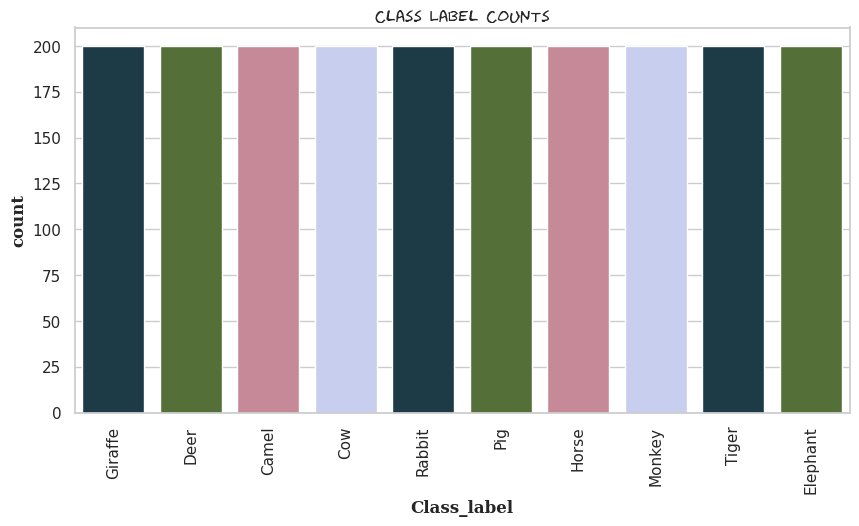

In [ ]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=df_upsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
data = df_upsampled.sample(frac=1)

In [ ]:
data.head()

Image_path Class_label
765  Animal_data/Cow/WhatsApp Image 2022-07-05 at 1...         Cow
803  Animal_data/Cow/WhatsApp Image 2022-07-05 at 1...         Cow
944  Animal_data/Horse/WhatsApp Image 2022-07-06 at...       Horse
402  Animal_data/Tiger/WhatsApp Image 2022-07-06 at...       Tiger
116  Animal_data/Tiger/WhatsApp Image 2022-07-06 at...       Tiger

## Resize the images

In [ ]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [ ]:
from PIL import Image

In [ ]:
#save resized images into images.
images = [resize_images(img) for img in data['Image_path']]

In [ ]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [ ]:
num_classes

10

In [ ]:
# save the class into class_names
class_names = list(data['Class_label'])

In [ ]:
# Print the shape of the image
images[10].shape

(224, 224, 3)

Text(0.5, 1.0, 'Deer')

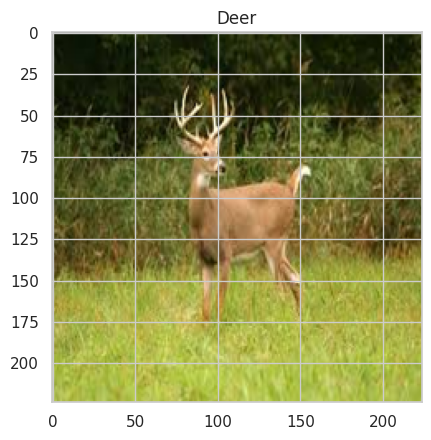

In [ ]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[5])

Text(0.5, 1.0, 'Pig')

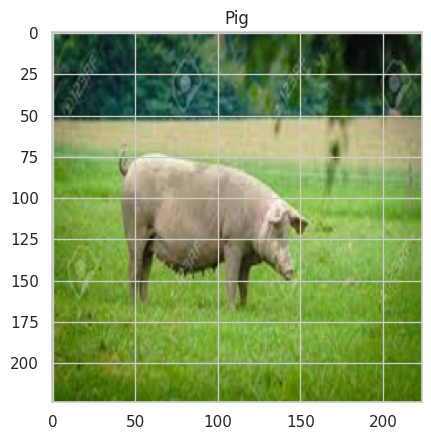

In [ ]:
#See the image with class label
plt.imshow(images[10])
plt.title(class_names[10])

Text(0.5, 1.0, 'Elephant')

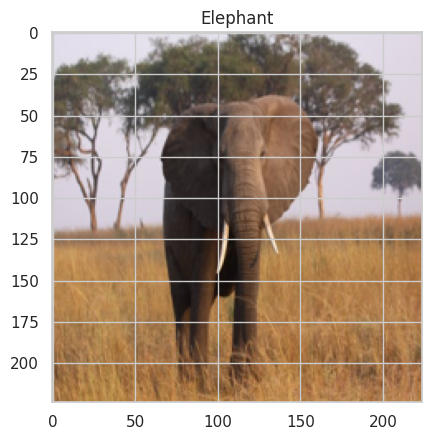

In [ ]:
#See the image with class label
plt.imshow(images[400])
plt.title(class_names[400])

Text(0.5, 1.0, 'Rabbit')

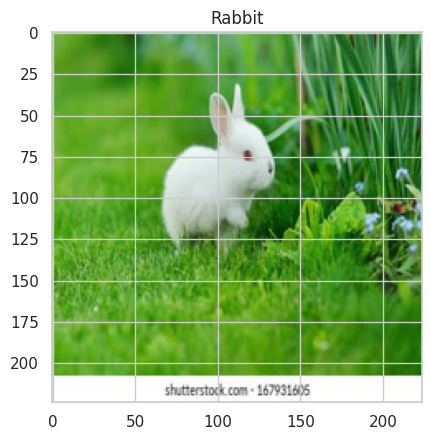

In [ ]:
#See the image with class label
plt.imshow(images[70])
plt.title(class_names[70])

Text(0.5, 1.0, 'Cow')

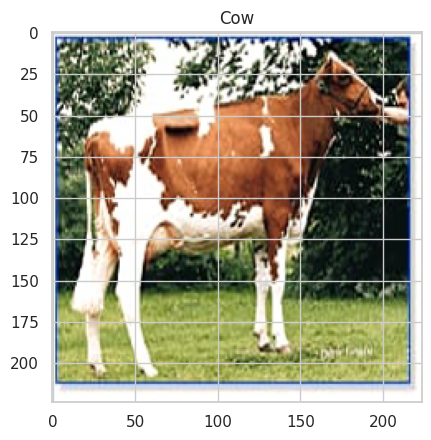

In [ ]:
#See the image with class label
plt.imshow(images[100])
plt.title(class_names[100])

Text(0.5, 1.0, 'Horse')

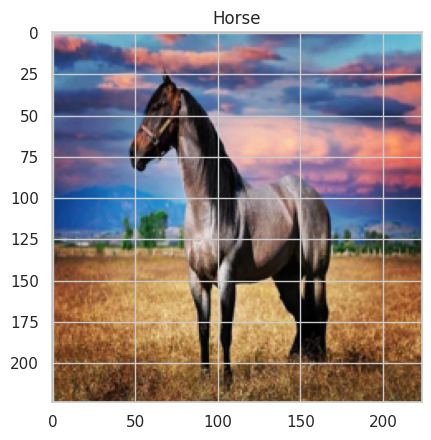

In [ ]:

#See the image with class label
plt.imshow(images[150])
plt.title(class_names[150])

Text(0.5, 1.0, 'Tiger')

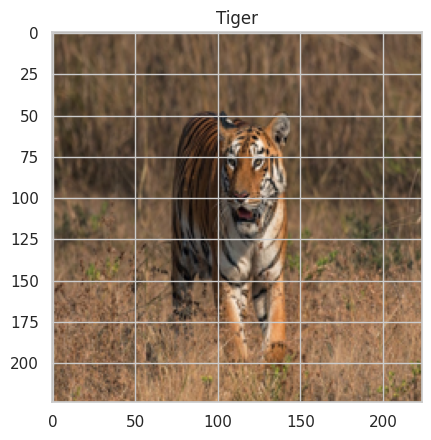

In [ ]:
#See the image with class label
plt.imshow(images[200])
plt.title(class_names[200])




























## Label encoder

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['Class_label'])

In [ ]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data['Class_label'][:10]

765        Cow
803        Cow
944      Horse
402      Tiger
116      Tiger
678       Deer
991       Deer
670    Giraffe
980      Tiger
672      Camel
Name: Class_label, dtype: object

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(2000, 224, 224, 3)

## Spliting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [ ]:
X_train.shape

(1400, 224, 224, 3)

In [ ]:
X_test.shape

(600, 224, 224, 3)

# CNN Model

In [ ]:
# Set the CNN model

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(lr=0.001)

optimizer = tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/50
11/11 [==============================] - 79s 4s/step - loss: 27.8812 - accuracy: 0.1036 - val_loss: 2.2955 - val_accuracy: 0.1400
Epoch 2/50
11/11 [==============================] - 9s 828ms/step - loss: 2.3913 - accuracy: 0.1057 - val_loss: 2.2878 - val_accuracy: 0.1567
Epoch 3/50
11/11 [==============================] - 8s 776ms/step - loss: 2.3077 - accuracy: 0.1293 - val_loss: 2.2780 - val_accuracy: 0.2000
Epoch 4/50
11/11 [==============================] - 9s 789ms/step - loss: 2.3061 - accuracy: 0.1464 - val_loss: 2.2833 - val_accuracy: 0.1717
Epoch 5/50
11/11 [==============================] - 9s 791ms/step - loss: 2.2788 - accuracy: 0.1371 - val_loss: 2.2871 - val_accuracy: 0.1517
Epoch 6/50
11/11 [==============================] - 8s 775ms/step - loss: 2.3130 - accuracy: 0.1421 - val_loss: 2.2845 - val_accuracy: 0.1217
Epoch 7/50
11/11 [==============================] - 8s 759ms/step - loss: 2.2789 - accuracy: 0.1486 - val_loss: 2.2559 - val_accuracy: 0.1650
Epoch 8

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


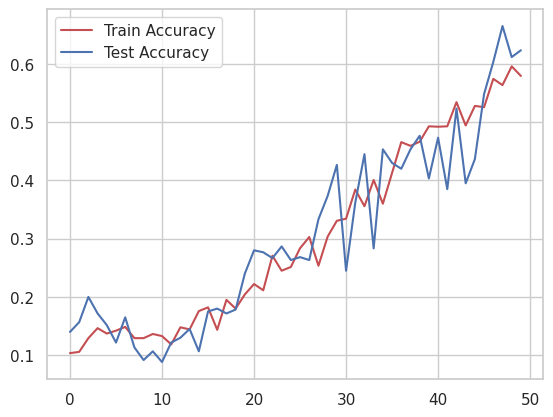

In [ ]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

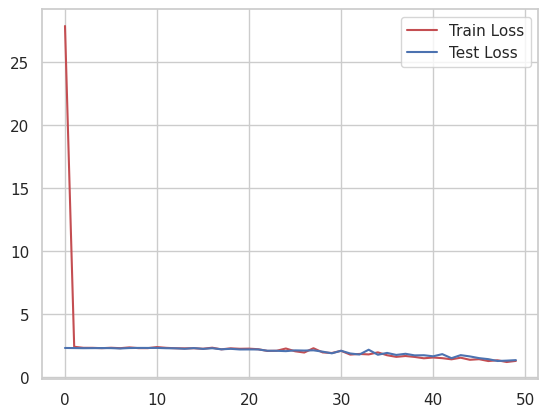

In [ ]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [ ]:
file_name = '/content/drive/MyDrive/Animal_project (1)/Animal_data_cnn.h5'

In [ ]:
# Save the model
#file_name = '/content/drive/MyDrive/Face/Face_Emotion_cnn.h5'
tf.keras.models.save_model(model,file_name)

In [ ]:
# print the test accuracy
score_1 = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.6233333349227905


In [ ]:
results = pd.DataFrame(columns=["Model",'Test Accuracy'])

In [ ]:
new = ['CNN ',score_1[1]]
results.loc[1] = new

19/19 [==============================] - 1s 35ms/step


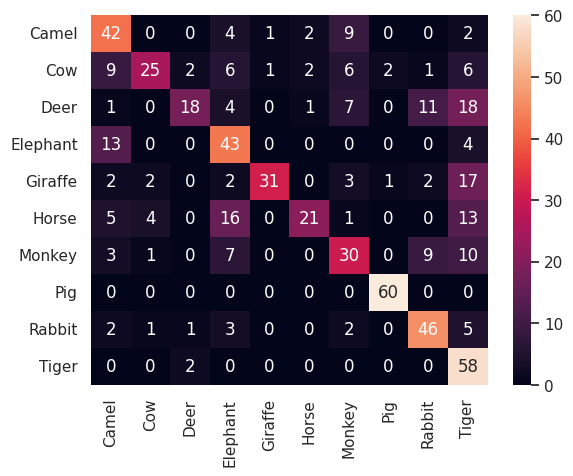

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming your model is named 'model' and X_test, y_test are your test data
# Use the predict method to get probabilities for each class
y_pred_probs = model.predict(X_test)

# Use np.argmax to get the predicted class
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get the true class labels
y_true_classes = np.argmax(y_test, axis=1)

# Get class names
class_names = enc.classes_

# Create a DataFrame for confusion matrix
df_heatmap = pd.DataFrame(confusion_matrix(y_true_classes, y_pred_classes), columns=class_names, index=class_names)

# Plot the confusion matrix
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


1/1 [==============================] - 0s 20ms/step


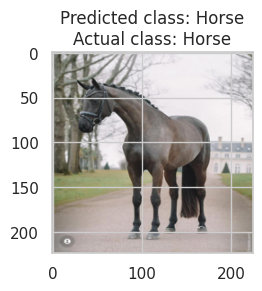

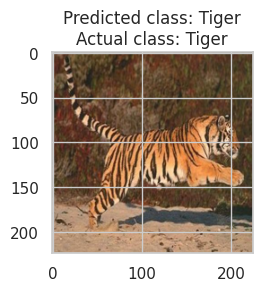

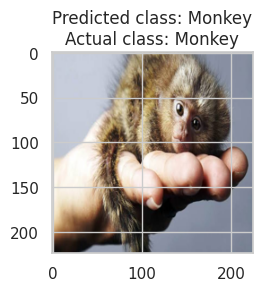

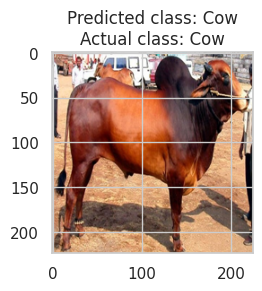

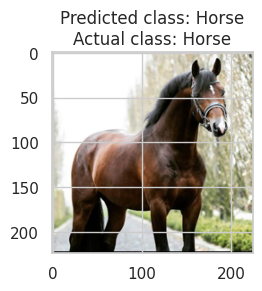

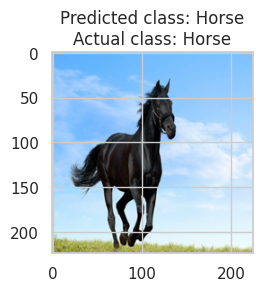

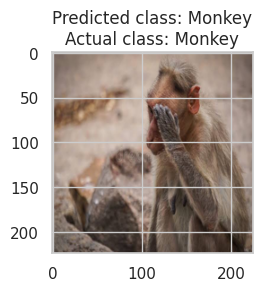

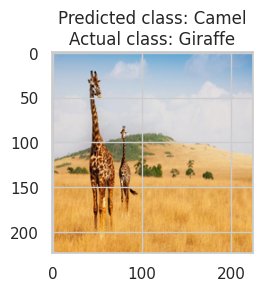

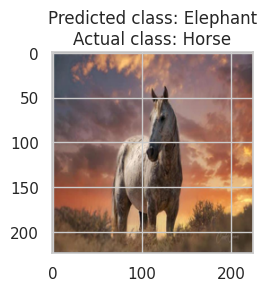

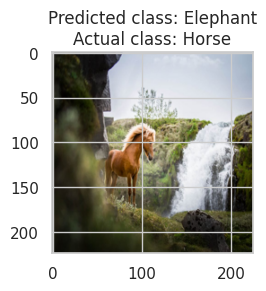

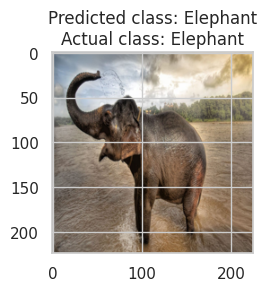

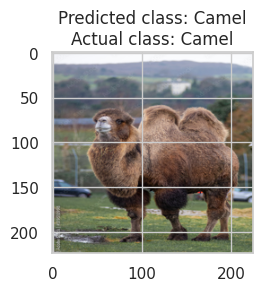

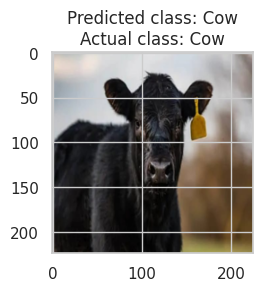

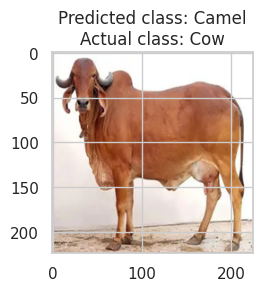

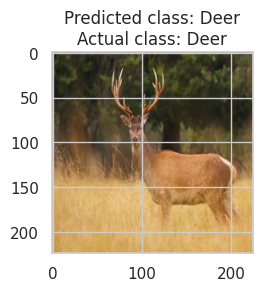

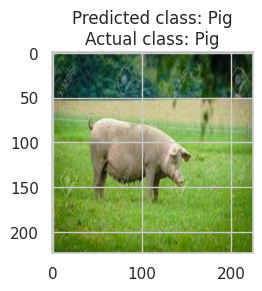

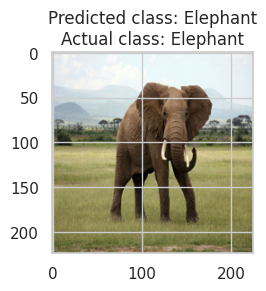

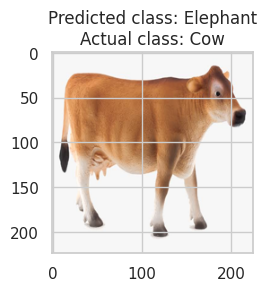

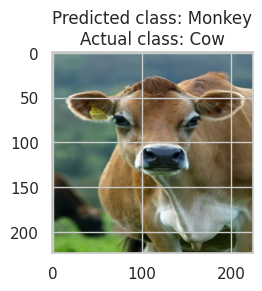

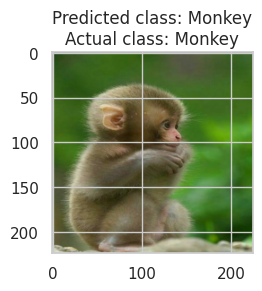

In [ ]:
# print images with actual and predicted class labels
for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i + 1)
    pred_probabilities = model.predict(np.array([X_test[i]]))[0]
    pred_class = np.argmax(pred_probabilities)
    actual_class = np.argmax(y_test[i])

    plt.title("Predicted class: {}\nActual class: {}".format(enc.classes_[pred_class], enc.classes_[actual_class]))
    plt.imshow(X_test[i])


# VGG_16 Model

In [ ]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg.trainable=False

In [ ]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
from tensorflow.keras.optimizers import Adam,RMSprop
opt = Adam(lr=0.001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#Fit the data or train the model
History_1 = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
11/11 [==============================] - 74s 5s/step - loss: 47.9797 - accuracy: 0.5364 - val_loss: 2.2383 - val_accuracy: 0.8917
Epoch 2/10
11/11 [==============================] - 9s 847ms/step - loss: 0.9549 - accuracy: 0.9307 - val_loss: 0.5109 - val_accuracy: 0.9583
Epoch 3/10
11/11 [==============================] - 11s 1s/step - loss: 0.2518 - accuracy: 0.9664 - val_loss: 0.4258 - val_accuracy: 0.9650
Epoch 4/10
11/11 [==============================] - 9s 874ms/step - loss: 0.1735 - accuracy: 0.9757 - val_loss: 0.6120 - val_accuracy: 0.9483
Epoch 5/10
11/11 [==============================] - 9s 888ms/step - loss: 0.2190 - accuracy: 0.9736 - val_loss: 1.2792 - val_accuracy: 0.9417
Epoch 6/10
11/11 [==============================] - 12s 1s/step - loss: 1.0101 - accuracy: 0.9443 - val_loss: 0.5176 - val_accuracy: 0.9650
Epoch 7/10
11/11 [==============================] - 12s 1s/step - loss: 0.2272 - accuracy: 0.9779 - val_loss: 0.4590 - val_accuracy: 0.9600
Epoch 8/10
11

In [ ]:
file_name = '/content/drive/MyDrive/Animal_project (1)/Animal_data_vgg-16.h5'

In [ ]:
# Save the model
tf.keras.models.save_model(model_1,file_name)

In [ ]:
# print the test accuracy
score_2 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9766666889190674


In [ ]:
new = ['VGG-16 ',score_2[1]]
results.loc[2] = new

19/19 [==============================] - 3s 144ms/step


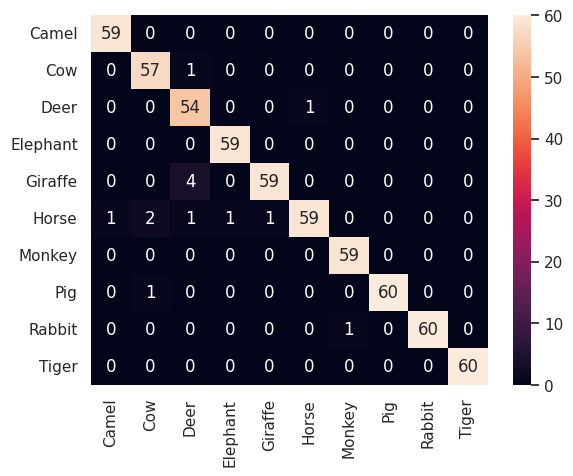

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
predicted_classes = np.argmax(model_1.predict(X_test), axis=1)

class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(predicted_classes, np.argmax(y_test, axis=1)), columns=class_names, index=class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

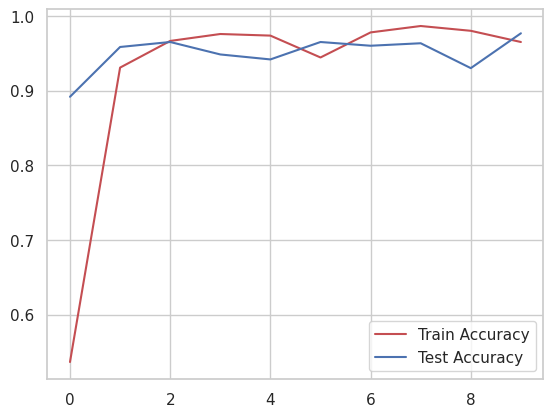

In [ ]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

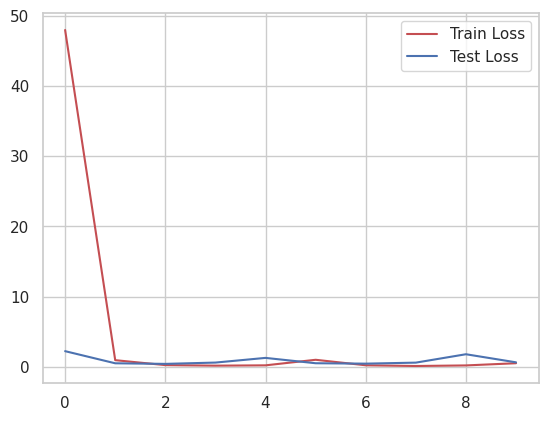

In [ ]:
# plot the accuracy plot
plt.plot(History_1.history['loss'], 'r')
plt.plot(History_1.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 [==============================] - 0s 18ms/step


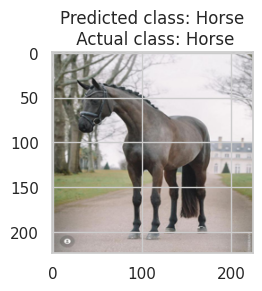

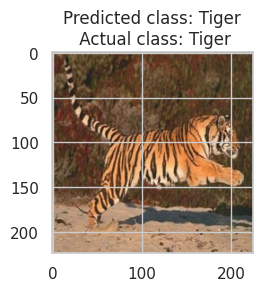

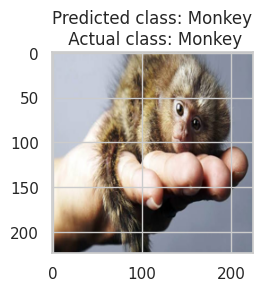

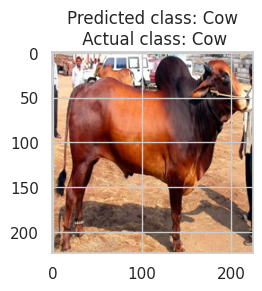

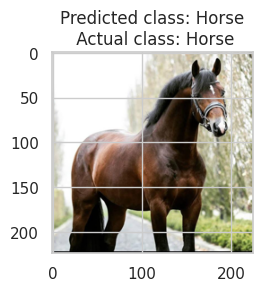

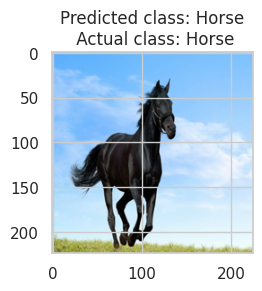

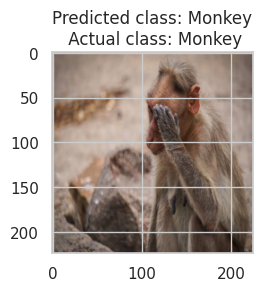

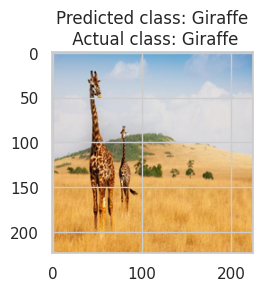

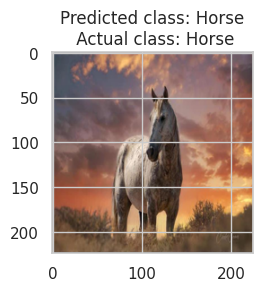

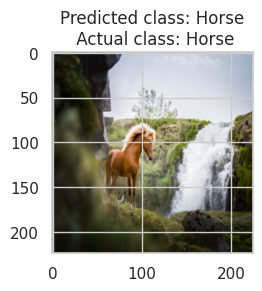

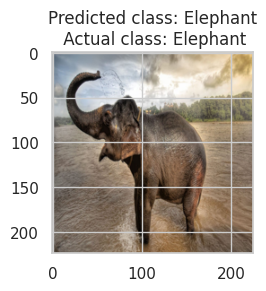

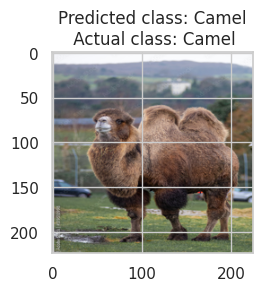

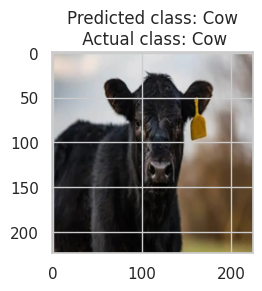

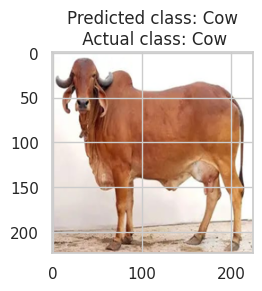

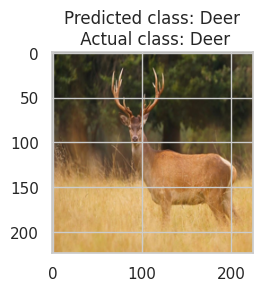

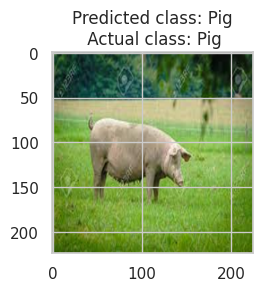

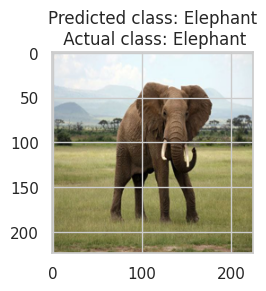

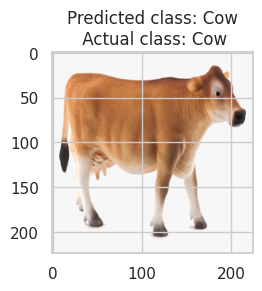

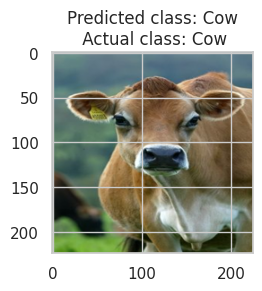

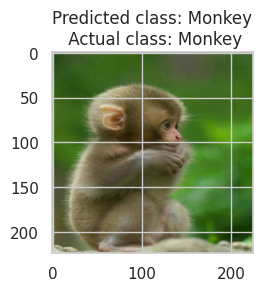

In [ ]:
# print images with actiual abnd predicted class labels
import matplotlib.pyplot as plt

for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i+1)

    # Assuming model_1 is your trained model
    pred_probs = model_1.predict(np.array([X_test[i]]))[0]
    pred = np.argmax(pred_probs)

    act = np.argmax(y_test[i])

    plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred], enc.classes_[act]))
    plt.imshow(X_test[i])


# VGG_19 Model

In [ ]:
# import the vgg16 model
from keras.applications.vgg19 import VGG19

In [ ]:
vgg_19 = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg_19.trainable=False

In [ ]:
# Set the vgg16 model
model_2=Sequential()
model_2.add(vgg_19)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax'))

In [ ]:
#Compile the model
from tensorflow.keras.optimizers import Adam,RMSprop
opt = Adam(lr=0.001)
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08)
model_2.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#Fit the data or train the model
History_2 = model_2.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
11/11 [==============================] - 13s 1s/step - loss: 54.2584 - accuracy: 0.5471 - val_loss: 1.2077 - val_accuracy: 0.9450
Epoch 2/10
11/11 [==============================] - 13s 1s/step - loss: 0.7856 - accuracy: 0.9571 - val_loss: 0.9676 - val_accuracy: 0.9683
Epoch 3/10
11/11 [==============================] - 13s 1s/step - loss: 0.2209 - accuracy: 0.9821 - val_loss: 0.7228 - val_accuracy: 0.9667
Epoch 4/10
11/11 [==============================] - 13s 1s/step - loss: 0.0528 - accuracy: 0.9921 - val_loss: 1.0237 - val_accuracy: 0.9617
Epoch 5/10
11/11 [==============================] - 11s 1s/step - loss: 0.1637 - accuracy: 0.9857 - val_loss: 0.7586 - val_accuracy: 0.9633
Epoch 6/10
11/11 [==============================] - 13s 1s/step - loss: 0.3984 - accuracy: 0.9671 - val_loss: 0.7452 - val_accuracy: 0.9733
Epoch 7/10
11/11 [==============================] - 13s 1s/step - loss: 0.4646 - accuracy: 0.9707 - val_loss: 1.5178 - val_accuracy: 0.9433
Epoch 8/10
11/11 [=

In [ ]:
file_name = '/content/drive/MyDrive/Animal_project (1)/Animal_data_vgg-19.h5'

In [ ]:
# Save the model
tf.keras.models.save_model(model_2,file_name)

In [ ]:
# print the test accuracy
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9449999928474426


In [ ]:
new = ['VGG-19 ',score_2[1]]
results.loc[3] = new

19/19 [==============================] - 3s 173ms/step


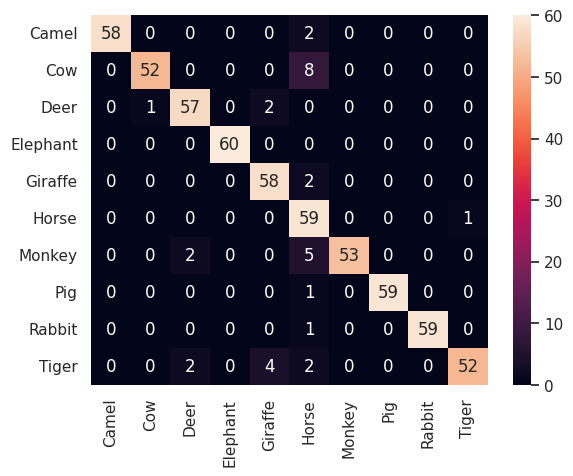

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
y_pred = model_2.predict(X_test)
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test, axis=1)

df_heatmap = pd.DataFrame(confusion_matrix(true_classes, predicted_classes), columns=class_names, index=class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")


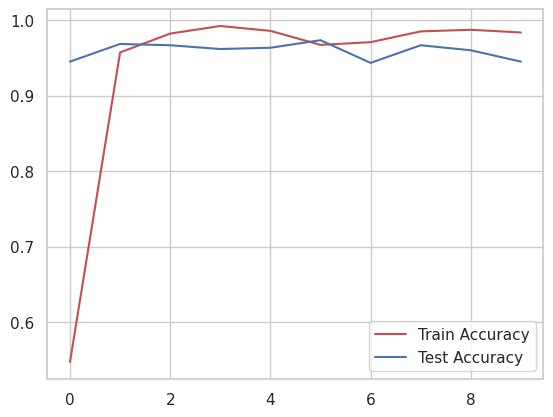

In [ ]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

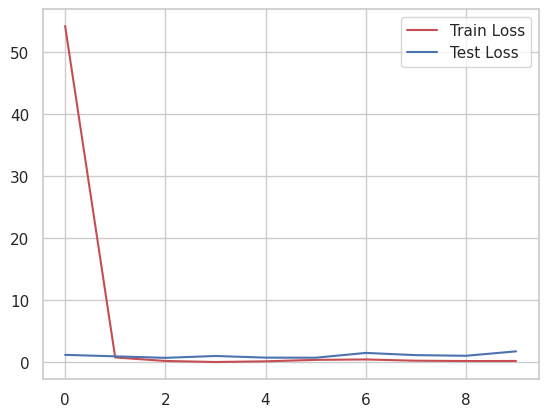

In [ ]:
# plot the accuracy plot
plt.plot(History_2.history['loss'], 'r')
plt.plot(History_2.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

1/1 [==============================] - 0s 18ms/step


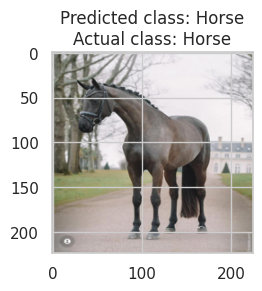

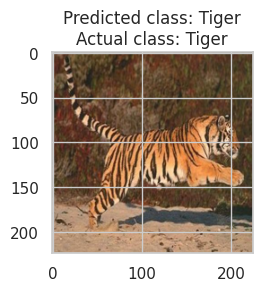

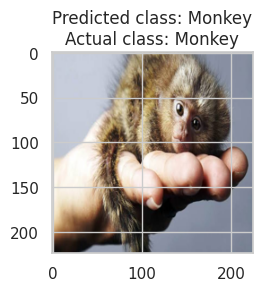

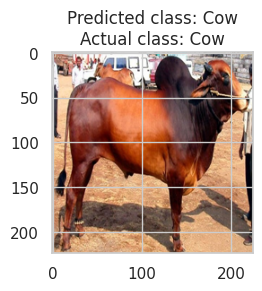

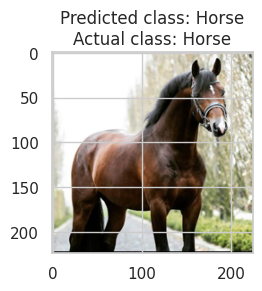

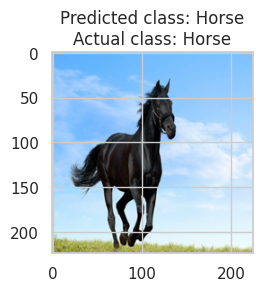

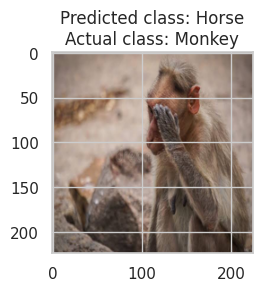

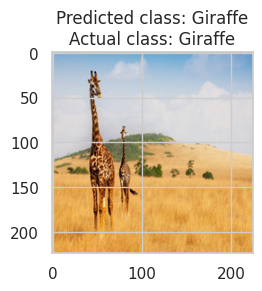

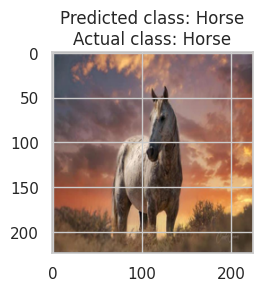

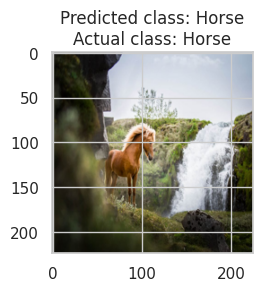

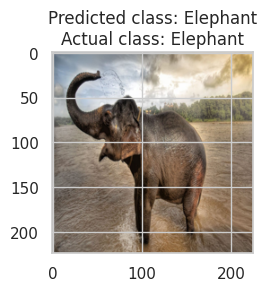

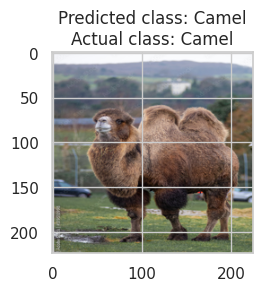

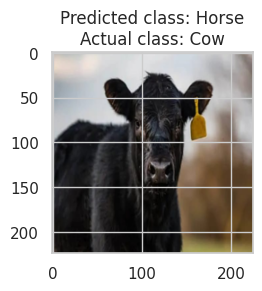

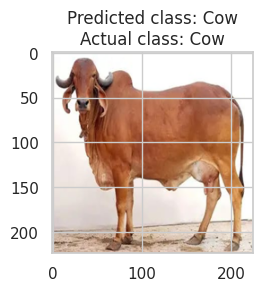

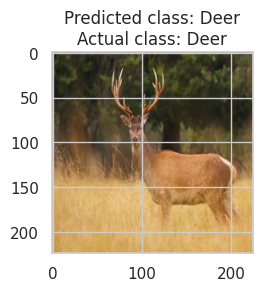

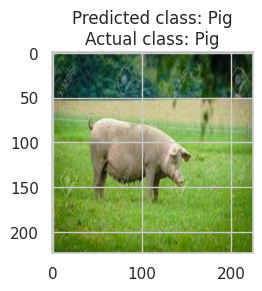

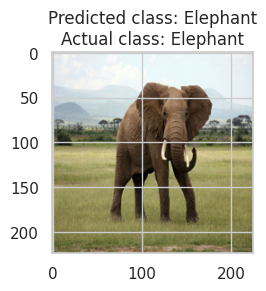

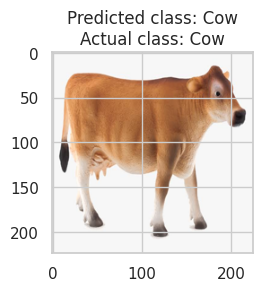

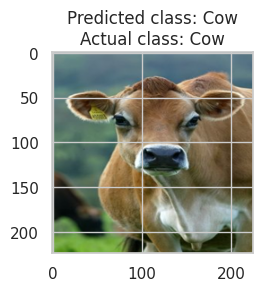

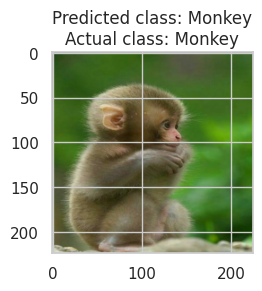

In [ ]:
# print images with actual and predicted class labels
for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i + 1)

    # Obtain predicted probabilities
    pred_probs = model_2.predict(np.array([X_test[i]]))[0]

    # Find the index of the maximum probability
    pred = np.argmax(pred_probs)

    # Find the actual class
    act = np.argmax(y_test[i])

    plt.title("Predicted class: {}\nActual class: {}".format(enc.classes_[pred], enc.classes_[act]))
    plt.imshow(X_test[i])


## Performance Table

In [ ]:
results

Model  Test Accuracy
1     CNN        0.623333
2  VGG-16        0.976667
3  VGG-19        0.945000

## Test image and mail notification

In [ ]:
# bounding box testing

img='/content/drive/MyDrive/Animal_project/Test/download (2).jpg'

file = Image.open(img)
img = file.convert('RGB')
img_bgr= img.resize((224, 224))
img_bgr = np.array(img_bgr)
img_bgr_reshape = img_bgr.reshape(1,224,224,3)

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Animal_project (1)/Animal_data_cnn.h5')
vgg_16 = tf.keras.models.load_model('/content/drive/MyDrive/Animal_project (1)/Animal_data_vgg-16.h5')
vgg_19 = tf.keras.models.load_model('/content/drive/MyDrive/Animal_project (1)/Animal_data_vgg-19.h5')

1/1 [==============================] - 0s 153ms/step


(221,
 b'2.0.0 closing connection o9-20020a056a00214900b006e4e616e520sm5020185pfk.72 - gsmtp')

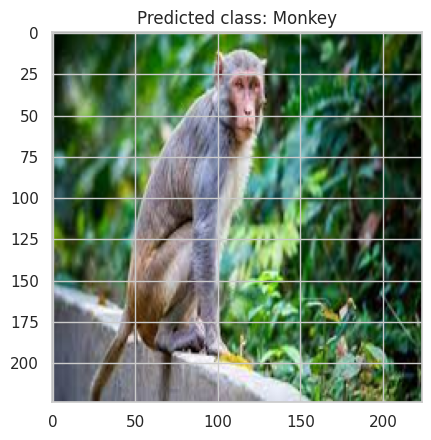

In [ ]:
# Make predictions
predictions = vgg_19.predict(img_bgr_reshape)

# Find the index of the maximum probability
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class = enc.classes_[predicted_class_index]

# Display the prediction result
plt.title("Predicted class: {}".format(predicted_class))
plt.imshow(img_bgr)

import smtplib

# creates SMTP session
s = smtplib.SMTP('smtp.gmail.com', 587)

# start TLS for security
s.starttls()

# Authentication
s.login("tvidhyalatha2@gmail.com", "jshskjopriooqylx")

# message to be sent
TEXT = "{} came into your field".format(predicted_class)
SUBJECT = "Animal Intrusion Notification"


message = 'Subject: {}\n\n{}'.format(SUBJECT, TEXT)


# sending the mail
s.sendmail("tvidhyalatha2@gmail.com", 'moulikakalimisetty9@gmail.com' ,message)

# terminating the session
s.quit()